# Previsão de Comportamento de Compra de Clientes em E-commerce

## Bibliotecas 

In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Dados

**Dicionário de Dados**: E-commerce Customer Behavior

link: https://www.kaggle.com/datasets/shriyashjagtap/e-commerce-customer-for-behavior-analysis/data

- _Customer ID_: Identificador numérico único para cada cliente.
- _Purchase Date_: Data e hora exatas em que a transação de compra foi realizada.
- _Product Category_: Categoria à qual o produto comprado pertence (ex: 'Electronics', 'Home', 'Clothing').
- _Product Price_: O preço de uma única unidade do produto adquirido.
- _Quantity_: O número de unidades do produto compradas nesta transação.
- _Total Purchase_ Amount: O valor total da transação (valor do "carrinho" naquela compra).
- _Payment Method_: O método de pagamento utilizado pelo cliente (ex: 'Credit Card', 'PayPal').
- _Customer Age_: A idade do cliente. É uma coluna redundante, idêntica à coluna Age.
- _Returns_: Indica se a compra foi devolvida (1) ou não (0). Possui valores faltantes.
- _Customer Name_: O nome do cliente. É uma variável de identificação que geralmente é removida para a modelagem.
- _Age_: A idade do cliente.
- _Gender_: O gênero do cliente (ex: 'Male', 'Female').
- _Churn_: Indica se o cliente abandonou a plataforma (1) ou não (0). Esta é a variável-alvo principal para o nosso modelo.

### Import

Eu baixei o arquivo para minha maquina, mas poderiamos carregá-lo da seguinte forma:
```{python}
# importa a biblioteca do Kaggle
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shriyashjagtap/e-commerce-customer-for-behavior-analysis")

df = pd.read_csv(f'{path}/ecommerce_customer_data_custom_ratios.csv')
df.head(2)

```

Vamos importar os dados que estão em nossa máquina.

In [ ]:
df_customers = pd.read_csv('dados/ecommerce_customer_data_custom_ratios.csv')
df_customers.head(2)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0


In [23]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


## Manipulação de Dados

- Podemos observar que a coluna _Customer Age_ e _Age_ são idênticas, o que indica redundância de dados. Podemos remover uma delas.

In [24]:
# Removendo a coluna 'Customer Age' pois é redundante com a coluna 'Age'
df_cstm_clean =  df_customers.drop(columns=['Customer Age'])
df_cstm_clean.columns

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Returns',
       'Customer Name', 'Age', 'Gender', 'Churn'],
      dtype='object')

- Vamos converter a coluna 'Purchase Date' para o tipo datetime do pandas.

In [29]:
# Converter 'Purchase Date' para datetime
df = df_cstm_clean.copy()
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df['Purchase Date'].head(2)

0   2020-09-08 09:38:32
1   2022-03-05 12:56:35
Name: Purchase Date, dtype: datetime64[ns]

- Vamos analisar valores ausentes, pois percebemos que a coluna _Returns_ tem alguns valores nulos.

C:\Users\joaomm\AppData\Local\Temp\ipykernel_25300\3132961619.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette='viridis')


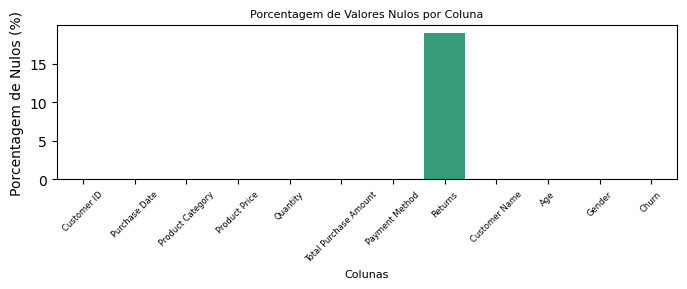

In [45]:
# Calcular a porcentagem de valores nulos por coluna
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Criar o gráfico
plt.figure(figsize=(8, 2))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette='viridis')
plt.title('Porcentagem de Valores Nulos por Coluna', fontsize=8)
plt.xlabel('Colunas', fontsize=8)
plt.ylabel('Porcentagem de Nulos (%)', fontsize=10)
plt.xticks(rotation=45, size=6)
plt.show()

O gráfico acima mostra que apenas a coluna Returns possui valores faltantes, correspondendo a quase 20% do total de registros

## Estatistica Descritiva

In [4]:
df_customers.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.00000,250000.000000,250000.000000,250000.000000,250000.000000,202404.000000,250000.000000,250000.000000
mean,25004.03624,254.659512,2.998896,2725.370732,43.940528,0.497861,43.940528,0.199496
std,14428.27959,141.568577,1.414694,1442.933565,15.350246,0.499997,15.350246,0.399622
min,1.00000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.000000
25%,12497.75000,132.000000,2.000000,1477.000000,31.000000,0.000000,31.000000,0.000000
50%,25018.00000,255.000000,3.000000,2724.000000,44.000000,0.000000,44.000000,0.000000
75%,37506.00000,377.000000,4.000000,3974.000000,57.000000,1.000000,57.000000,0.000000
max,50000.00000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.000000


Pontos a destacar

- **Volume de Transações**: O conjunto de dados contém 250.000 observações, representando o total de transações de compra registradas.

- **Dados Faltantes**: Há um ponto de atenção na coluna Returns, que possui apenas 202.404 registros preenchidos(~81%). Isso indica que aproximadamente 19% das entradas para esta variável estão ausentes e precisarão de tratamento.

- **Base de Clientes**: Os Customer ID variam de 1 a 50.000, sugerindo que o dataset acompanha a atividade de 50.000 clientes únicos. Com 250.000 compras, isso resulta em uma média de 5 compras por cliente.

- **Faixa Etária**: A idade dos clientes (Age) varia de 18 a 70 anos. A média e a mediana são muito próximas, em torno de 44 anos, indicando que o público principal é de meia-idade, sem uma distorção significativa por clientes muito jovens ou muito idosos.

- **Redundância de Dados**: As colunas _Customer Age_ e _Age_ são estatisticamente idênticas, confirmando que uma delas pode ser removida no processo de limpeza.

- **Preço dos Produto (Product Price)**: Os preços dos itens individuais variam de $10 a $500. A média de $254.66 é quase idêntica à mediana de $255, o que sugere uma distribuição de preços bem equilibrada, sem valores extremos (outliers) influenciando a média.

- **Quantidade por Compra (Quantity)**: Os clientes compram entre 1 e 5 itens por transação. A maioria das compras (mediana) inclui 3 itens.

- **Valor Total da Compra (Total Purchase Amount)**: O valor gasto por transação vai de $100 a $5.350. Novamente, a média ($2725) e a mediana ($2724) são praticamente iguais, mostrando uma distribuição simétrica dos valores de compra.

- **Taxa de Devolução (Returns)**: Esta é uma variável binária (0 ou 1). A média de 0.497 indica que, dos registros preenchidos, cerca de 49.8% das compras resultaram em uma devolução. É uma taxa bastante elevada e um fator potencialmente importante.

- **Taxa de Abandono (Churn)**: Também uma variável binária. A média de 0.199 nos informa que aproximadamente 20% das transações no dataset pertencem a clientes que foram classificados como "churned" (que abandonaram a plataforma). Este será o nosso principal evento de interesse negativo na análise de sobrevivência.